In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import seaborn as sns
import time 
import datetime
import re

import torch

In [2]:
df= pd.read_csv('./2016to2023F1PracticeAndQual.csv')

In [3]:
df

,Pos,No,Driver,Car,Time,Gap,Laps,Year,Race,Pos_practice_2,...,Laps_practice_2,Pos_practice_3,Time_practice_3,Gap_practice_3,Laps_practice_3,Pos_qual,Q1,Q2,Q3,Laps_qual
0,1,11,Sergio Perez PER,Red Bull Racing Honda RBPT,01:32.8,+0.0s,21,2023,GULFAIRBAHRAIN,3,...,26,3,01:32.4,+0.106s,12,2,01:31.5,01:30.7,01:29.8,15
1,2,14,Fernando Alonso ALO,Aston Martin Aramco Mercedes,01:33.2,+0.438s,22,2023,GULFAIRBAHRAIN,1,...,25,1,01:32.3,+0.0s,13,5,01:31.2,01:30.6,01:30.3,15
2,3,1,Max Verstappen VER,Red Bull Racing Honda RBPT,01:33.4,+0.617s,21,2023,GULFAIRBAHRAIN,2,...,24,2,01:32.3,+0.005s,13,1,01:31.3,01:30.5,01:29.7,15
3,4,4,Lando Norris NOR,McLaren Mercedes,01:34.2,+1.407s,21,2023,GULFAIRBAHRAIN,9,...,27,13,01:33.2,+0.862s,16,11,01:31.7,01:31.4,NaN,13
4,5,16,Charles Leclerc LEC,Ferrari,01:34.3,+1.499s,17,2023,GULFAIRBAHRAIN,4,...,26,5,01:32.6,+0.284s,21,3,01:31.1,01:30.3,01:30.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,17,20,Kevin Magnussen MAG,Renault,01:46.4,+3.503s,21,1,ETIHADAIRWAYSABUDHABI,20,...,25,16,01:43.1,+2.282s,17,18,01:42.1,NaN,NaN,6
2850,18,14,Fernando Alonso ALO,McLaren Honda,01:46.4,+3.510s,21,1,ETIHADAIRWAYSABUDHABI,11,...,33,11,01:42.6,+1.810s,14,9,01:41.6,01:41.0,01:41.1,17
2851,19,94,Pascal Wehrlein WEH,MRT Mercedes,01:46.5,+3.589s,29,1,ETIHADAIRWAYSABUDHABI,17,...,33,17,01:43.1,+2.370s,17,16,01:41.9,01:42.0,NaN,14
2852,20,22,Jenson Button BUT,McLaren Honda,01:47.1,+4.258s,10,1,ETIHADAIRWAYSABUDHABI,12,...,24,13,01:42.7,+1.889s,15,12,01:41.2,01:41.3,NaN,14


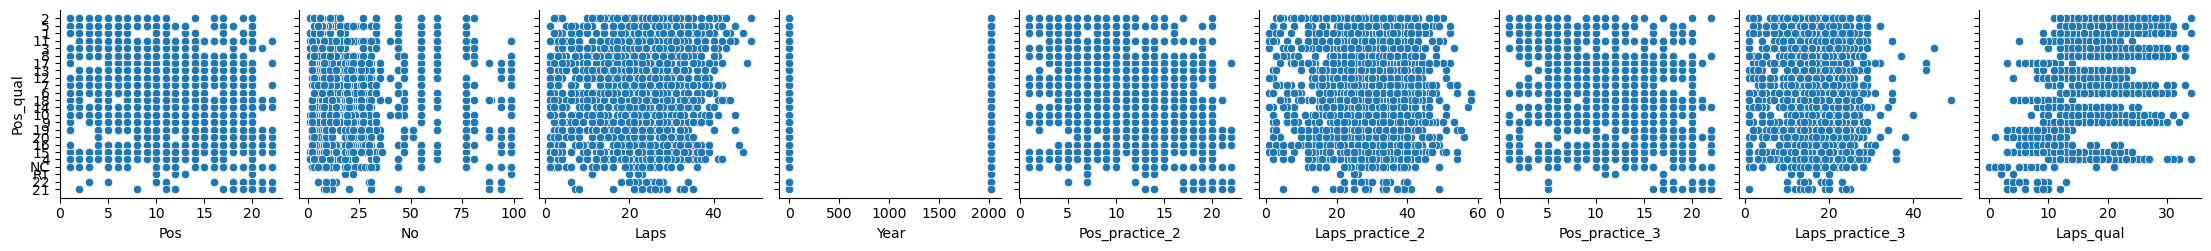

In [10]:
sns.pairplot(df, y_vars=["Pos_qual"])

Maybe we need to convert the times to datetimes?

In [12]:
pd.to_datetime(df["Q3"])

C:\Users\Xaalt\AppData\Local\Temp\ipykernel_4132\2232858002.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df["Q3"])


DateParseError: Unknown datetime string format, unable to parse: DNF, at position 7

In [13]:
df["Q3"][0]

'01:29.8'

In [45]:
timing= time.strptime(df["Gap"][0].split('.')[0], '%M:%S')

ValueError: time data '+0' does not match format '%M:%S'

In [41]:
x = datetime.timedelta(minutes=timing.tm_min, seconds=timing.tm_sec)

In [42]:
reallap= x.seconds+ float(df["Q3"][0].split('.')[1])/10

In [43]:
reallap

89.8

In [44]:
df.columns

Index(['Pos', 'No', 'Driver', 'Car', 'Time', 'Gap', 'Laps', 'Year', 'Race',
       'Pos_practice_2', 'Time_practice_2', 'Gap_practice_2',
       'Laps_practice_2', 'Pos_practice_3', 'Time_practice_3',
       'Gap_practice_3', 'Laps_practice_3', 'Pos_qual', 'Q1', 'Q2', 'Q3',
       'Laps_qual'],
      dtype='object')

In [ ]:
times = ['Time', 'Time_practice_2', 'Time_practice_3', 'Q1', 'Q2', 'Q3']

In [62]:
df["Gap"]

0          +0.0s
1        +0.438s
2        +0.617s
3        +1.407s
4        +1.499s
          ...   
2849     +3.503s
2850     +3.510s
2851     +3.589s
2852     +4.258s
2853    +19.120s
Name: Gap, Length: 2854, dtype: object

In [67]:
y=[]
i=0
for t in df["Gap"]:
        
    y.append(float(re.findall('\d+\.\d+', t)[0]))
    print(i)
    i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129


TypeError: expected string or bytes-like object, got 'float'

In [59]:
df["Gap"].isnull().values.any()

True

In [73]:
pd.isnull(df["Gap"][130])

True

In [48]:
df["Gap"][0]

'+0.0s'

In [60]:
float(re.findall('\d+\.\d+', df["Gap"])[0])

TypeError: expected string or bytes-like object, got 'Series'

In [128]:
df2 =df.dropna()
df2 = df2.reset_index()

In [129]:
df2

,Pos,No,Driver,Car,Time,Gap,Laps,Year,Race,Pos_practice_2,...,Laps_practice_2,Pos_practice_3,Time_practice_3,Gap_practice_3,Laps_practice_3,Pos_qual,Q1,Q2,Q3,Laps_qual
0,1,11,Sergio Perez PER,Red Bull Racing Honda RBPT,01:32.8,+0.0s,21,2023,GULFAIRBAHRAIN,3,...,26,3,01:32.4,+0.106s,12,2,01:31.5,01:30.7,01:29.8,15
1,2,14,Fernando Alonso ALO,Aston Martin Aramco Mercedes,01:33.2,+0.438s,22,2023,GULFAIRBAHRAIN,1,...,25,1,01:32.3,+0.0s,13,5,01:31.2,01:30.6,01:30.3,15
2,3,1,Max Verstappen VER,Red Bull Racing Honda RBPT,01:33.4,+0.617s,21,2023,GULFAIRBAHRAIN,2,...,24,2,01:32.3,+0.005s,13,1,01:31.3,01:30.5,01:29.7,15
4,5,16,Charles Leclerc LEC,Ferrari,01:34.3,+1.499s,17,2023,GULFAIRBAHRAIN,4,...,26,5,01:32.6,+0.284s,21,3,01:31.1,01:30.3,01:30.0,17
5,6,18,Lance Stroll STR,Aston Martin Aramco Mercedes,01:34.3,+1.540s,17,2023,GULFAIRBAHRAIN,6,...,28,7,01:32.9,+0.579s,16,8,01:31.2,01:31.1,01:30.8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5,5,Sebastian Vettel VET,Ferrari,01:44.0,+1.136s,27,1,ETIHADAIRWAYSABUDHABI,3,...,31,1,01:40.8,+0.0s,16,5,01:40.3,01:40.0,01:39.7,14
2839,6,11,Sergio Perez PER,Force India Mercedes,01:44.2,+1.286s,23,1,ETIHADAIRWAYSABUDHABI,8,...,35,7,01:41.9,+1.110s,19,8,01:40.9,01:40.7,01:40.5,12
2840,7,7,Kimi RÃ¤ikkÃ¶nen RAI,Ferrari,01:44.6,+1.687s,27,1,ETIHADAIRWAYSABUDHABI,6,...,34,3,01:41.0,+0.224s,14,4,01:40.3,01:39.6,01:39.6,14
2842,9,19,Felipe Massa MAS,Williams Mercedes,01:45.0,+2.170s,27,1,ETIHADAIRWAYSABUDHABI,10,...,36,14,01:42.7,+1.908s,20,10,01:41.2,01:40.9,01:41.2,15


In [130]:
df2["Gap_practice_1"]=[float(re.findall('\d+\.\d+', t)[0]) for t in df2["Gap"]]
df2["Gap_practice_2_2"]=[float(re.findall('\d+\.\d+', t)[0]) for t in df2["Gap_practice_2"]]
df2["Gap_practice_3_2"]=[float(re.findall('\d+\.\d+', t)[0]) for t in df2["Gap_practice_3"]]

C:\Users\Xaalt\AppData\Local\Temp\ipykernel_4132\983558272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Gap_practice_1"]=[float(re.findall('\d+\.\d+', t)[0]) for t in df2["Gap"]]
C:\Users\Xaalt\AppData\Local\Temp\ipykernel_4132\983558272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Gap_practice_2_2"]=[float(re.findall('\d+\.\d+', t)[0]) for t in df2["Gap_practice_2"]]
C:\Users\Xaalt\AppData\Local\Temp\ipykernel_4132\983558272.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [132]:
df2["Gap_practice_2_2"]

0       0.171
1       0.000
2       0.169
4       0.460
5       0.543
        ...  
2838    0.269
2839    1.180
2840    0.603
2842    1.407
2850    1.505
Name: Gap_practice_2_2, Length: 1228, dtype: float64

In [85]:
df2.cov(("Gap_practice_1", "Pos_qual"))

ValueError: could not convert string to float: 'Sergio Perez PER'

In [124]:
df2["Gap_practice_2"]=[float(re.findall('\d+\.\d+', t)[0]) for t in df2["Gap_practice_2"]]

In [87]:
df2['Pos_qual'][0]

'2'

In [88]:
df2['Pos_qual']=float(df2["Pos_qual"])

TypeError: cannot convert the series to <class 'float'>

In [138]:
df2["Pos_qual"][721]=-1 #721 has NC not float so drop?
df2['Pos_qual']=pd.to_numeric(df2['Pos_qual'])

In [137]:
df2["Pos_qual"][721]=-1

C:\Users\Xaalt\AppData\Local\Temp\ipykernel_4132\446179021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Pos_qual"][721]=-1


In [121]:
from scipy.stats import pearsonr

In [122]:
pearsonr(df2['Pos_qual'], df2['Gap_practice_1'])

PearsonRResult(statistic=0.4165665466621268, pvalue=9.935889484373996e-53)

In [135]:
pearsonr(df2['Pos_qual'], df2['Gap_practice_2_2'])

TypeError: unsupported operand type(s) for +: 'float' and 'str'